# Kryptografia historyczna

Wczytanie bibliotek

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Iterable
from collections import Counter
from itertools import *
from collections import namedtuple
from Crypto.Cipher import ARC4

## Przydatne funkcje

Strona o łamaniu kodów [link](https://inventwithpython.com/cracking/chapter19.html).

Czytanie kolejnych lini ze standardowego wejścia

In [29]:
import fileinput
for line in fileinput.input():
    print(line)
    
# Nie działa w Jupyter Notebook

FileNotFoundError: [Errno 2] No such file or directory: '-f'

### Rot13
Mapowanie liter szyfrem cezara o 13 pozycji.

In [30]:
# Utworzenie mapowania
table = str.maketrans("abcdefghijklmnopqrstuvwxyz", "nopqrstuvwxyzabcdefghijklm")

sentance = 'To zdanie jest zakodowane.'

kryptogram = str.translate(sentance, table)

print(kryptogram)

Tb mqnavr wrfg mnxbqbjnar.


### Badanie częstotliwości
Histogram częstotliowści liter

In [31]:
def countLetters(string : str) -> Dict[str, int]:
    # Fill dictionary
    count = {chr(i) : 0 for i in range(ord('a'), ord('z')+1)}
    for c in string.lower():
        if c in count:
            count[c] = count[c] + 1
    
    return count

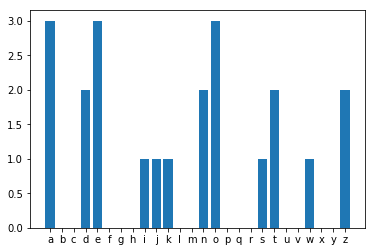

In [32]:
sentence = 'To zdanie jest zakodowane'

frequency = countLetters(sentence)

plt.bar(frequency.keys(), frequency.values())
plt.show()

To samo ale z wykorzystaniem klasy `Counter`.

<BarContainer object of 26 artists>

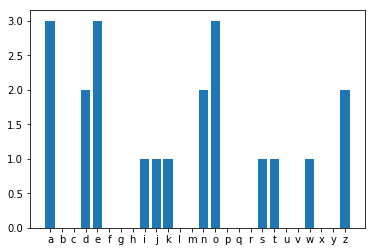

In [33]:
sentence = 'To zdanie jest zakodowane'

frequency = Counter(sentence)
letters = [chr(i) for i in range(ord('a'), ord('z')+1)]

plt.bar(letters, [frequency[l] for l in letters])


## Konwersja znaków na kody

In [34]:
def strToCodes(string : str) -> Iterable[int]:
    return (ord(c) for c in string)

def codesToStr(codes : Iterable[int]) -> str:
    return ''.join((chr(c) for c in codes))

## Dystrybucja liter w korpusie języka polskiego

<BarContainer object of 35 artists>

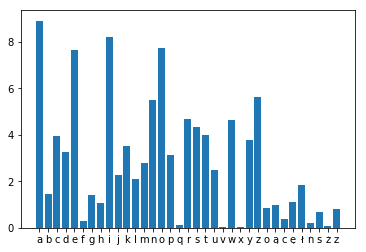

In [35]:
pl_distribution = {'a': 8.91, 'w': 4.65, 'p': 3.13, 'g': 1.42, 'ć': 0.40, 'i': 8.21, 's': 4.32, 'm': 2.80, 'ę': 1.11, 'f': 0.30, 'o': 7.75, 't': 3.98, 'u': 2.50, 'h': 1.08, 'ń': 0.20, 'e': 7.66, 'c': 3.96, 'j': 2.28, 'ą': 0.99, 'q': 0.14, 'z': 5.64, 'y': 3.76, 'l': 2.10, 'ó': 0.85, 'ź': 0.06, 'n': 5.52, 'k': 3.51, 'ł': 1.82, 'ż': 0.83, 'v': 0.04, 'r': 4.69, 'd': 3.25, 'b': 1.47, 'ś': 0.66, 'x': 0.02}

# plt.bar(pl_distribution.keys(), pl_distribution.values())

# Waro patrzeć na 5 najczęstrzych i 5 najrzadszych
# plt.bar(['a', 'b'], [8., 5])

orderded = sorted(pl_distribution.items(), key=lambda x: x[0])
plt.bar(*zip(*orderded))



## Zadania

### Zadanie 1
Napisz program szyfrujący algorytmem przesunięcia cyklicznego o wybraną liczbę. Jako alfabet proszę założyć dowolny znak, którego kod znajduje się w przedziale <0, 255>. Przydatne funkcje w Python to `chr(kod)` i `ord(znak)`.

In [36]:
def cyclicalMove(string : str, step : int) -> str:
    limit = 256 # Exclusive maximal value
    
    codes = map(lambda c: (c + step) % limit, strToCodes(string))
    return codesToStr(codes)
    

sentence = 'THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG'
print(sentence)

step = -3
cryptogram = cyclicalMove(sentance, step)
print(cryptogram)

restored = cyclicalMove(cryptogram, -step)
print(restored)

THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG
Qlwa^kfbgbpqw^hlalt^kb+
To zdanie jest zakodowane.


### Zadanie 2
Napisz program szyfrujący algorytmem Vigenere. Założenia odnośnie do alfabetu jak w 1.

In [37]:
def vigenereEncode(string : str, key : str) -> str:
    limit = 256 # Exclusive maximal value
    
    key = cycle(strToCodes(key))
    codes = strToCodes(string)

    codes = map(lambda c: (c + next(key) % limit), codes)
    return codesToStr(codes)

def vigenereDecode(string : str, key : str) -> str:
    limit = 256 # Exclusive maximal value
    
    key = cycle(strToCodes(key))
    codes = strToCodes(string)

    codes = map(lambda c: (c - next(key) % limit), codes)
    return codesToStr(codes)
    

sentence = 'TO JEST BARDZO TAJNY TEKST'
print(sentence)

key = 'TAJNE'
cryptogram = vigenereEncode(sentence, key)
print(cryptogram)

restored = vigenereDecode(cryptogram, key)
print(restored)

TO JEST BARDZO TAJNY TEKST
¨j§j¦¤e¨t¨
TO JEST BARDZO TAJNY TEKST


### Zadanie 3
Za pomocą analizy statystycznej postaraj się odszyfrować tekst zaszyfrowany algorytmem przesunięcia cyklicznego o nieznanym kluczu.

In [38]:
englishLetterFrequency = { "a": 8.167, "b": 1.492, "c": 2.782, "d": 4.253, "e": 12.702, "f": 2.228, "g": 2.015, "h": 6.094, "i": 6.966, "j": 0.153, "k": 0.772, "l": 4.025, "m": 2.406, "n": 6.749, "o": 7.507, "p": 1.929, "q": 0.095, "r": 5.987, "s": 6.327, "t": 9.056, "u": 2.758, "v": 0.978, "w": 2.360, "x": 0.150, "y": 1.974, "z": 0.074 }

sortedLetterFrequency = sorted(englishLetterFrequency.items(), key=lambda l: l[1], reverse=True)

with open('crypto.rot', 'rb') as file:
    data = file.read()
    
    frequency = {c : 0 for c in range(256)}
    for b in data:
        frequency[b] = frequency[b] + 1
        
    sortedFrequency = sorted(frequency.items(), key=lambda l: l[1], reverse=True)
#     print(sortedFrequency)
    
#     diff = 50
#     recovered1 = [chr((b - diff) % 255) for b in data]
#     print(''.join(recovered1))
    
    for i in range(2):
        diff = sortedFrequency[i][0] - ord(sortedLetterFrequency[0][0])
        print(diff)
        
        recovered = [chr((b - diff) % 255) for b in data]
        print(''.join(recovered))
        
#         print(diff)

#     recovered1 = [chr((b + diff) % 255) for b in data]
#     print(''.join(recovered1))
        
    
    

93
eEe:eDeEeAe:e(e>eBe>eAe6eGeAeNeIe=e:eBe6e>eCeBeDeIe>eKe6eIe>eDeCe;eDeGeIe=e:e8eGeJeHe6e9e:eHüe7e:eNeDeCe9eIe=e:eEeGeDeBe>eHe:eDe;eLe:e6eAeIe=ýeLe6eHeIe=e6eIe=eGe>eHeIe>e6eCeHeLe:eGe:eHeJeEeEeDeHe:e9eAeNe7e:e>eCe<eHeAe6eJe<e=eIe:eGe:e9e6eCe9e=e6e9eIeDe7e:eHe6eKe:e9Þe$e7eKe>eDeJeHeAeNeBe:e9e>e6eEeGeDeEe6e<e6eCe9e6e8e6eCe>eCe8e>eIe:eEe:eDeEeAe:eIeDe@e>eAeAeCeIe:eGe6e8eIe>eKe:e;e>e8eIe>eDeCeAe>e@e:eKe>e9e:eDe<e6eBe:eHeDeCeIe=e:eDeIe=e:eGe=e6eCe9eEeGe:eHe:eCeIeHeKe>eDeAe:eCe8e:e>eCe6eCe6eGeGe6eIe>eKe:e8eDeCeIe:eMeIeLe=e>e8e=eBe6eNeKe:eGeNeLe:eAeAe9e:eHe:eCeHe>eIe>eOe:eEe6eGeIe>e8e>eEe6eCeIeHeIeDeHe6e>e9eKe>eDeAe:eCe8e:e7eJeIeCeDe8e6eJeHe6eIe>eKe:eAe>eCe@e=e6eHe:eKe:eGe7e:e:eCeEeGeDeKe:eC"eDeDeGe:ûeHe=eNeEeDeIe=e:eHe>eHüeLe=e>e8e=e6eEeEe6eGe:eCeIeAeNe8eDeBe:eHe6eIeAe:e6eHeIe>eCeEe6eGeIe;eGeDeBeIe=e:e7eDeDe@öeJeAeIeJeGe:eDe;e:e6eGöe7eNe6eGeGeNeAe6eHeHeCe:eGe6eAeHeDe6e9eKe:eGeIe>eHe:e9eDeC"eDeDeGe:ûeHeLe:e7eHe>eIe:ýe>eHeIe=e6eIeIe=e:e8eDeCeHeIe6eCeIe7eDeBe7e6eGe9eBe:e







AdefenseofMichaelMooreand"BowlingforColumbine"(Op-Ed)ByEloquenceWedAug13th,2003at09:00:09AMEST

ThisisanopenlettertoDavidHardy,authorofBowlingforColumbine:DocumentaryorFiction?,probablythemostcomprehensiveamongmanyrebuttalsoftheOscar-winningdocumentary.Criticshavenowgonesofarastocallfortherevocationoftheaward.Theirchancesaresmall,however,astheirargumentsrelyonpolemic,exaggerationandmisrepresentation--inotherwords,onthesametechniqueswhichtheyaccuseMooreofusing.
DearDavidHardy,
Itisfascinatingtowatchtheorganizedcharacterassa

### Zadanie 4
Porównaj rozkłady statystyczne tekstów w trzech różnych językach.

W porównaniu będę brał pod uwagę **tylko litery alfabetu łacińskiego** ponieważ występują w każym z wybranych języków.

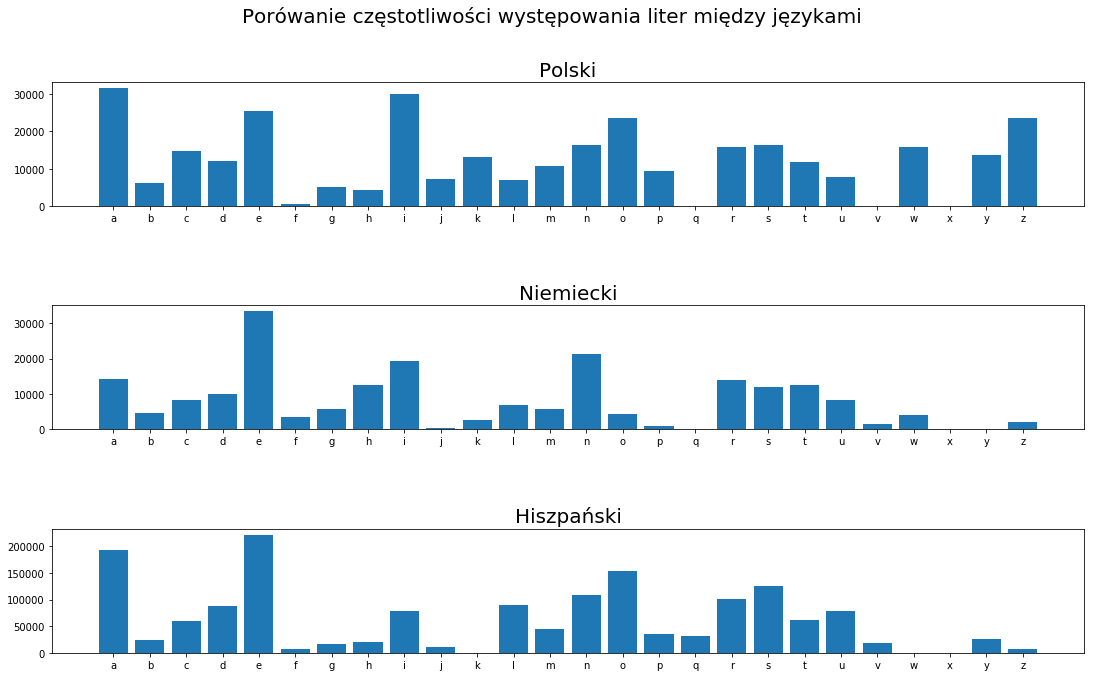

In [39]:
TextData = namedtuple('TextData', ['language', 'path'])

texts = [TextData('Polski', 'Multi_language/Pan_Tadeusz.txt'), TextData('Niemiecki', 'Multi_language/Der_Vorleser.txt'), TextData('Hiszpański', 'Multi_language/Don_Quijote.txt')]

# Count letters
statistics = {}
for text in texts:
    with open(text.path, 'r') as file:
        count = {chr(i) : 0 for i in range(ord('a'), ord('z')+1)}

        for line in file:
            for c in line.lower():
                if c in count:
                    count[c] = count[c] + 1
        
        statistics[text.language] = count

# Display results
fig, axs = plt.subplots(len(texts))
fig.suptitle('Porówanie częstotliwości występowania liter między językami', fontsize=20)    
fig.subplots_adjust(hspace = 0.8)
fig.set_size_inches(18.5, 10.5)

for i, text in enumerate(texts):
    count = statistics[text.language]
    axs[i].bar(count.keys(), count.values())
    axs[i].set_title(text.language, fontsize=20)


### Zadanie 5
Zaimplementuj samodzielnie algorytm generowania klucza algorytmem RC4 i napisz program szyfrujący przy pomocy XOR i klucza generowanego przez RC4.

In [40]:
def RC4GenerateKey(string : str) -> Iterable[int]:
    key = cycle(strToCodes(string))
    S = [i for i in range(256)]
    
    j = 0
    for i in range(256):
        j = (j + S[i] + next(key)) % 256
        S[i], S[j] = S[j], S[i]
    
    return S

def RC4Encode(data : str, key : List[int]) -> str:
    i, j = 0, 0
    S = key
    data = strToCodes(data)
    cryptogram = []
    
    for c in data:
        i = (i + 1) % 256
        j = (j + S[i]) % 256
        S[i], S[j] = S[j], S[i]
        
        k = S[(S[i] + S[j]) % 256]
        cryptogram.append(c ^ k)
        
    return codesToStr(cryptogram)
        
    
sentence = 'TO JEST BARDZO TAJNY TEKST'
print(sentence)

key = 'TAJNE'
S = RC4GenerateKey(key)
cryptogram = RC4Encode(sentence, S)
# print(cryptogram)
print(bytes(strToCodes(cryptogram)))

S = RC4GenerateKey(key)
restored = RC4Encode(cryptogram, S)
print(restored)


TO JEST BARDZO TAJNY TEKST
b'k\x10F\x83K\xa0\xa15\xcd\xc5K*J\x994K\x90\xa8\x11v\x99\xea\x9a\xc5\t\xfc'
TO JEST BARDZO TAJNY TEKST


### Zadanie 6
Zweryfikuj zgodność swojej implementacji z ARC4 z biblioteki PyCrypto.

In [41]:
sentence = 'TO JEST BARDZO TAJNY TEKST'
print(sentence)

key = 'TAJNE'
cipher = ARC4.new(key)
cryptogram = cipher.encrypt(sentence)
print(cryptogram)

cipher = ARC4.new(key)
restored = cipher.decrypt(cryptogram)
print(restored)

TO JEST BARDZO TAJNY TEKST
b'k\x10F\x83K\xa0\xa15\xcd\xc5K*J\x994K\x90\xa8\x11v\x99\xea\x9a\xc5\t\xfc'
b'TO JEST BARDZO TAJNY TEKST'


### Zadanie 7
Napisz algorytm obliczający entropię łańcucha bajtów. Prawdopodobieństwo symboli oblicz na podstawie ich częstotliwości występowania w łańcuchu.

In [42]:
def entropy(data : bytes) -> float:
    count = [0] * 256
    dataSize = len(data)
    for b in data: count[b] = count[b] + 1
    
    entropy = 0
    for b in range(256):
        entropy += (count[b] / dataSize) * count[b]
        
    return 1 - entropy / dataSize


sentence = "A complete sentence must have, at minimum, three things: a subject, verb, and an object. The subject is typically a noun or a pronoun. And, if there's a subject, there's bound to be a verb because all verbs need a subject. Finally, the object of a sentence is the thing that's being acted upon by the subject."
entropy(bytes(strToCodes(sentence))) * 100

92.46237471329376

### Zadanie 8
Porównaj entropie tekstu naturalnego z entropia kryptogramu.

In [43]:
sentence = "A complete sentence must have, at minimum, three things: a subject, verb, and an object. The subject is typically a noun or a pronoun. And, if there's a subject, there's bound to be a verb because all verbs need a subject. Finally, the object of a sentence is the thing that's being acted upon by the subject."

e1 = entropy(bytes(strToCodes(sentence)))
print(f'Entropia zdania {e1:.2%}')

cryptogram = cyclicalMove(sentence, -3)
e2 = entropy(bytes(strToCodes(cryptogram)))
print(f'Entropia kryptogramu dla szyfru cezara {e2:.2%}')

cryptogram = vigenereEncode(sentence, 'TAJNE')
e3 = entropy(bytes(strToCodes(cryptogram)))
print(f'Entropia kryptogramu dla Vigenere\'a {e3:.2%}')

cipher = ARC4.new('TAJNE')
cryptogram = cipher.encrypt(sentence)
e4 = entropy(cryptogram)
print(f'Entropia kryptogramu dla ARC4 {e3:.2%}')

Entropia zdania 92.46%
Entropia kryptogramu dla szyfru cezara 92.46%
Entropia kryptogramu dla Vigenere'a 97.21%
Entropia kryptogramu dla ARC4 97.21%


In [44]:
with open('Multi_language/Pan_Tadeusz.txt', 'r') as file:
    text = '\n'.join(file.readlines())
    codes = list(filter(lambda c: 0 <= c <= 255, strToCodes(text)))
    e = entropy(codes)
    print(f'Entropia Pana Tadeusza {e:.2%}')
    
    cipher = ARC4.new('TAJNE')
    cryptogram = cipher.encrypt(bytes(codes))
    e4 = entropy(cryptogram)
    print(f'Entropia kryptogramu dla ARC4 {e3:.2%}')
    

Entropia Pana Tadeusza 94.41%
Entropia kryptogramu dla ARC4 97.21%


### Zadanie 9
Napisz program przeprowadzający atak brutalnej siły na kryptogram.

**Strategia**  
Będę próbował zdekodować kryptogram wszystkimi możliwymi kluczami o rosnącej długości aż **entropia spadnie** poniżej wyznaczonej granicy.

In [45]:
def bruteforceARC4(cryptogram : bytes, maxKeyLength : int = 5, keyAlphabet = range(256)) -> None:
    entropyThreshold = 0.9585

    for length in range(1, maxKeyLength+1):
        possibleKeys = product(keyAlphabet, repeat=length)
        for k in possibleKeys:
            k = codesToStr(k)        
            cipher = ARC4.new(k)
            recovered = cipher.decrypt(cryptogram)
            e = entropy(recovered)

            if e < entropyThreshold:
                print('\nZnaleziono rozwiązanie!\n')
                print(f'Klucz: {k}')
                print(f'Wiadomość: {recovered}')
                break

        print(f'Nie ma rozwiązania dla klucza długości {length}')

In [46]:
data = "A complete sentence must have, at minimum, three things: a subject, verb, and an object. The subject is typically a noun or a pronoun. And, if there's a subject, there's bound to be a verb because all verbs need a subject. Finally, the object of a sentence is the thing that's being acted upon by the subject."
key = 'abc'

cipher = ARC4.new(key)
cryptogram = cipher.encrypt(data)

keyAlphabet = range(ord('a'), ord('z') + 1)
bruteforceARC4(cryptogram, 3, keyAlphabet)


Nie ma rozwiązania dla klucza długości 1
Nie ma rozwiązania dla klucza długości 2

Znaleziono rozwiązanie!

Klucz: abc
Wiadomość: b"A complete sentence must have, at minimum, three things: a subject, verb, and an object. The subject is typically a noun or a pronoun. And, if there's a subject, there's bound to be a verb because all verbs need a subject. Finally, the object of a sentence is the thing that's being acted upon by the subject."
Nie ma rozwiązania dla klucza długości 3


In [47]:
with open('crypto.rc4', 'rb') as file:
    data = file.read()
    
    keyAlphabet = range(ord('a'), ord('z') + 1)
    bruteforceARC4(data, 3, keyAlphabet)

Nie ma rozwiązania dla klucza długości 1
Nie ma rozwiązania dla klucza długości 2

Znaleziono rozwiązanie!

Klucz: def
Wiadomość: b'\n\n\n\n\n\nA defense of Michael Moore and "Bowling for Columbine" (Op-Ed)By Eloquence Wed Aug 13th, 2003 at 09:00:09 AM EST \n\nThis is an open letter to David Hardy, author of Bowling for Columbine: Documentary or Fiction?, probably the most comprehensive among many rebuttals of the Oscar-winning documentary. Critics have now gone so far as to call for the revocation of the award. Their chances are small, however, as their arguments rely on polemic, exaggeration and misrepresentation -- in other words, on the same techniques which they accuse Moore of using. \nDear David Hardy, \nIt is fascinating to watch the organized character assassination of Michael Moore that has been going on in the United States since the release of his last documentary. In a time of simple-minded patriotism, loud, clear and dissenting voices like Mr. Moore\'s are perceived as di